# **DSDR 2025 Round 3 Group 0+c**
**"Flying Higher: Enhancing Customer Satisfaction in Airlines"**

# **Introduction**

**Group 0+c**

This notebook addresses the tasks for Round 3 of the Data Science Digital Race 2025. The goal of this round is to analyze and derive actionable insights from the Airline Passenger Review Dataset. The goal is to:
1. Identify factors driving passenger satisfaction
2. Find common themes in feedback
3. Benchmark the airline's performance by region, route and travel class
4. Suggest data-driven strategies to improve customer experience

This analysis will provide insights to help the airline boost loyalty and service quality.

# Insert Dataset and Libraries

mount at google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

Import Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Airline Review.csv")

#Initial Data Exploration

In [ ]:
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
df.tail()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
23166,23166,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,Bangkok to Tokyo. I’ve flown many low cost ai...,NaN,Couple Leisure,Economy Class,Bangkok to Tokyo,June 2022,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no
23169,23169,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,Tokyo to Los Angeles,May 2022,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes
23170,23170,ZIPAIR,1,"""lost all of our money with no refund""",20th May 2022,True,They lied about connection in Narita and we ...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,May 2022,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no


In [ ]:
n_reviews = df.shape[0]
print(f"Number of passenger reviews in the dataset: {n_reviews}")

Number of passenger reviews in the dataset: 23171


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [ ]:
df.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618374,2.871609,2.553586,2.353738,2.179056,1.780405,2.451165
std,6689.03588,1.464840,1.604631,1.526314,1.595747,1.488839,1.318800,1.594155
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Preprocessing

convert 'review date' and 'date flown' to datetime format

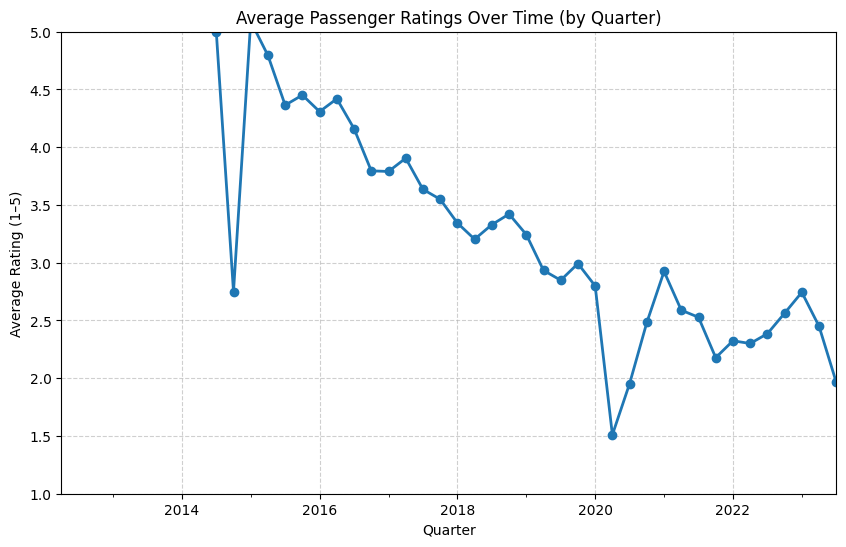

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()

df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce')
df['Date Flown'] = pd.to_datetime(df['Date Flown'], errors='coerce')

df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')

df['quarter'] = df['Date Flown'].dt.to_period('Q')

avg_ratings = df.groupby('quarter')['Overall_Rating'].mean()

plt.figure(figsize=(10,6))
avg_ratings.plot(marker='o', linewidth=2)
plt.title("Average Passenger Ratings Over Time (by Quarter)")
plt.xlabel("Quarter")
plt.ylabel("Average Rating (1–5)")
plt.ylim(1,5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

This chart shows a steep and steady decline in passenger ratings from 2014 to 2022. Starting from a high of nearly 4.5 out of 5, the average rating fell to about 2.0. This indicates a significant long-term drop in passenger satisfaction, suggesting a major decline in the perceived quality of the service over time.

**Handle missing values**

In [ ]:
numerical_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
                  'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

categorical_cols = ['Airline Name', 'Type Of Traveller', 'Seat Type', 'Route', 'Aircraft']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

missing_data = df.isnull().sum()
print("Missing Data After Imputation:\n", missing_data)

Missing Data After Imputation:
 Unnamed: 0                   0
Airline Name                 0
Overall_Rating             842
Review_Title                 0
Review Date               5113
Verified                     0
Review                       0
Aircraft                     0
Type Of Traveller            0
Seat Type                    0
Route                        0
Date Flown                3754
Seat Comfort                 0
Cabin Staff Service          0
Food & Beverages             0
Ground Service               0
Inflight Entertainment       0
Wifi & Connectivity          0
Value For Money              0
Recommended                  0
quarter                   3754
dtype: int64


Remove Rows with Missing Dates

In [ ]:
df = df.dropna(subset=['Review Date', 'Date Flown'])

missing_data = df.isnull().sum()
print("Missing Data After Dropping Rows with Missing Dates:\n", missing_data)

Missing Data After Dropping Rows with Missing Dates:
 Unnamed: 0                0
Airline Name              0
Overall_Rating            0
Review_Title              0
Review Date               0
Verified                  0
Review                    0
Aircraft                  0
Type Of Traveller         0
Seat Type                 0
Route                     0
Date Flown                0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Inflight Entertainment    0
Wifi & Connectivity       0
Value For Money           0
Recommended               0
quarter                   0
dtype: int64


Verifying Missing Values Post-Imputation

In [ ]:
missing_data = df.isnull().sum()
print("Final Missing Data After All Imputations:\n", missing_data)

Final Missing Data After All Imputations:
 Unnamed: 0                0
Airline Name              0
Overall_Rating            0
Review_Title              0
Review Date               0
Verified                  0
Review                    0
Aircraft                  0
Type Of Traveller         0
Seat Type                 0
Route                     0
Date Flown                0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Inflight Entertainment    0
Wifi & Connectivity       0
Value For Money           0
Recommended               0
quarter                   0
dtype: int64


clean text data

In [ ]:
df['Review'] = df['Review'].str.lower()
df['Review'] = df['Review'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['Review'] = df['Review'].str.strip()

Remove Duplicate Rows

In [ ]:
df = df.drop_duplicates()

Verify the final shape and the first few rows of the cleaned data

In [ ]:
print("Data Shape After Preprocessing: ", df.shape)
df.head()

Data Shape After Preprocessing:  (15163, 21)


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,...,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,quarter
0,0,AB Aviation,9.0,"""pretty decent airline""",2019-11-11,True,moroni to moheli turned out to be a pretty dec...,A320,Solo Leisure,Economy Class,...,2019-11-01,4.0,5.0,4.000000,4.0,2.179056,1.780405,3.0,yes,2019Q4
1,1,AB Aviation,1.0,"""Not a good airline""",2019-06-25,True,moroni to anjouan it is a very small airline m...,E120,Solo Leisure,Economy Class,...,2019-06-01,2.0,2.0,1.000000,1.0,2.179056,1.780405,2.0,no,2019Q2
2,2,AB Aviation,1.0,"""flight was fortunately short""",2019-06-25,True,anjouan to dzaoudzi a very small airline and t...,Embraer E120,Solo Leisure,Economy Class,...,2019-06-01,2.0,1.0,1.000000,1.0,2.179056,1.780405,2.0,no,2019Q2
3,3,Adria Airways,1.0,"""I will never fly again with Adria""",2019-09-28,False,please do a favor yourself and do not fly with...,A320,Solo Leisure,Economy Class,...,2019-09-01,1.0,1.0,2.553586,1.0,2.179056,1.780405,1.0,no,2019Q3
4,4,Adria Airways,1.0,"""it ruined our last days of holidays""",2019-09-24,True,do not book a flight with this airline my frie...,A320,Couple Leisure,Economy Class,...,2019-09-01,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,no,2019Q3


# General Summary and Descriptive Statistics

In [ ]:
print(df.describe())
print(df.info())

         Unnamed: 0  Overall_Rating                    Review Date  \
count  15163.000000    15163.000000                          15163   
mean   11629.104201        2.874233  2020-11-01 22:35:57.198443520   
min        0.000000        1.000000            2012-04-25 00:00:00   
25%     5841.500000        1.000000            2019-01-14 12:00:00   
50%    11497.000000        1.000000            2021-08-29 00:00:00   
75%    17579.500000        4.000000            2023-02-05 00:00:00   
max    23170.000000        9.000000            2023-07-27 00:00:00   
std     6716.288660        2.766625                            NaN   

                          Date Flown  Seat Comfort  Cabin Staff Service  \
count                          15163  15163.000000         15163.000000   
mean   2020-09-23 20:57:16.892435456      2.590730             2.857105   
min              2012-04-01 00:00:00      1.000000             1.000000   
25%              2018-12-01 00:00:00      1.000000             1.0000

# Step 1: Passenger Satisfaction Overview

- look at the distribution of overall rating (1-10)
- do a sentiment analysis (positive/negative/neutral) on the written reviews to see if it aligns with ratings
- show general trends (exp: "most ratings cluster around 7-8, but there's a heavy tail of 1-3 very unhappy customers")



Convert Overall_Rating to Numeric

In [ ]:
df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')

Visualizing the Distribution of Overall_Rating

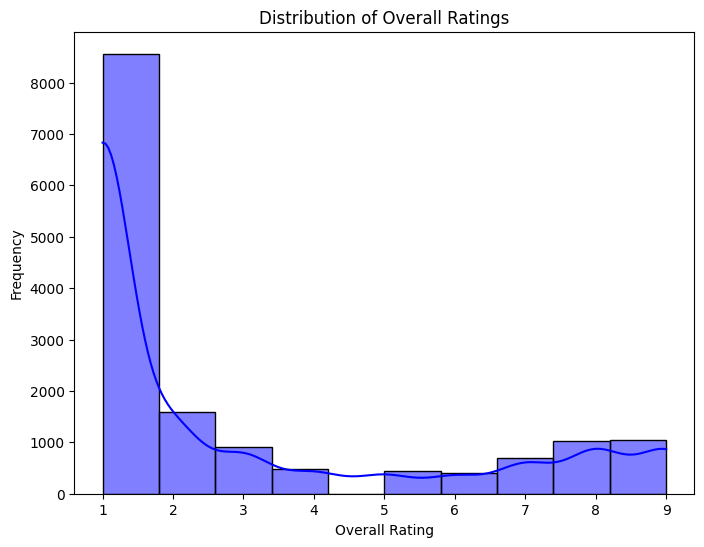

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Overall_Rating'], kde=True, bins=10, color='blue')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

Most users gave the lowest possible rating (1), while higher ratings (especially 7–9) occur but are far less common, suggesting strong dissatisfaction overall with a small group of positive reviewers.

Correlation Analysis

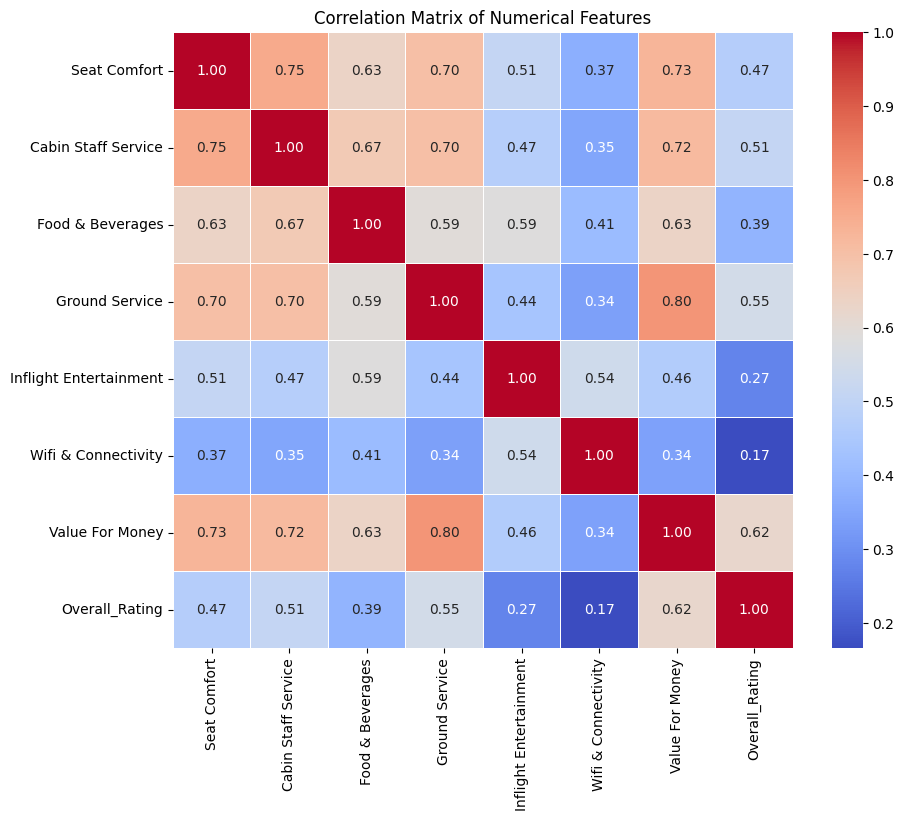

In [ ]:
correlation_matrix = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
                         'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money', 'Overall_Rating']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Passengers’ overall satisfaction is most influenced by Value for Money, Ground Service, and Cabin Staff Service, while WiFi has little impact. Improving these top factors would likely raise overall ratings.

Grouping Data by Segments

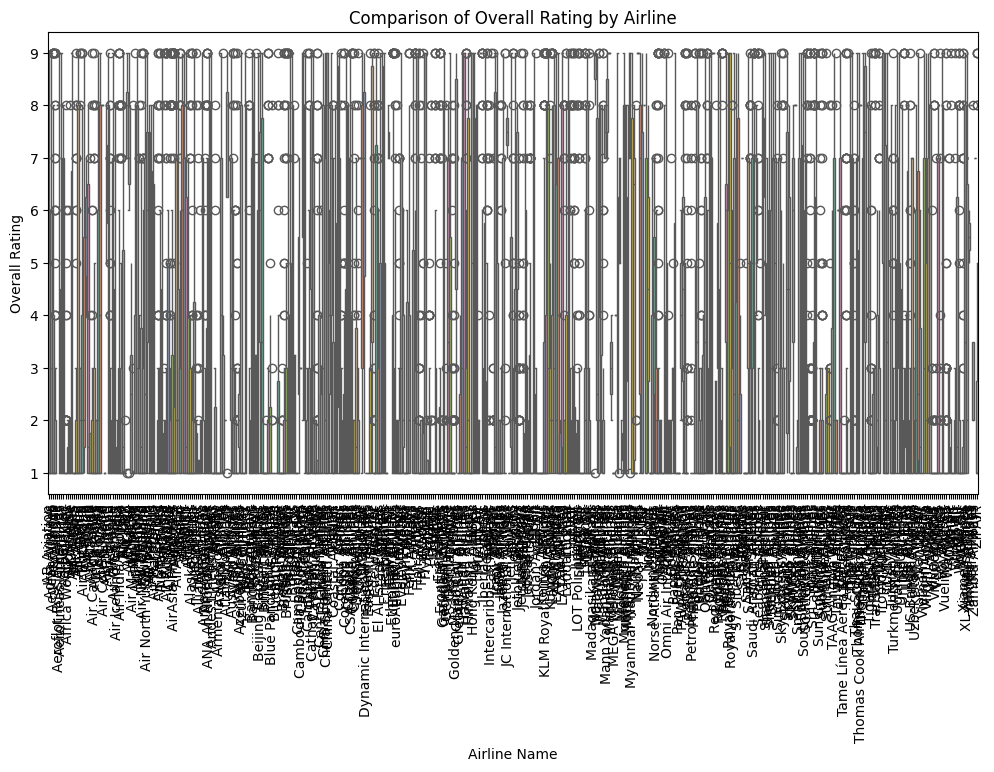

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airline Name', y='Overall_Rating', palette='Set2')
plt.title('Comparison of Overall Rating by Airline')
plt.xticks(rotation=90)
plt.ylabel('Overall Rating')
plt.show()

Overall ratings vary greatly across airlines, but low ratings dominate, regardless of airline. Only a few carriers manage to receive consistently higher ratings, while most suffer from a concentration of poor reviews.

Sentiment Analysis of Reviews

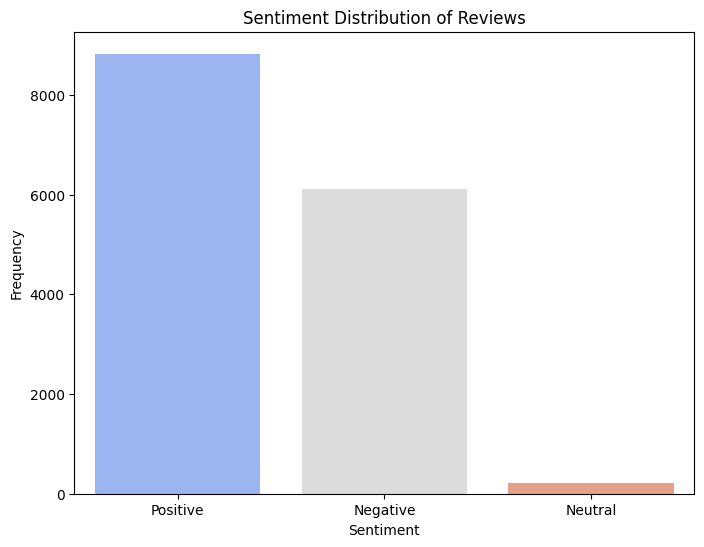

In [ ]:
from textblob import TextBlob

df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment_Label', palette='coolwarm')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

Word Cloud for Review Themes

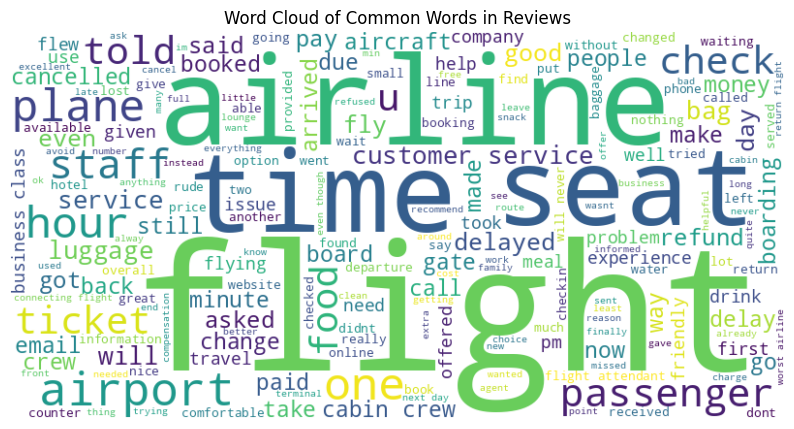

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Reviews')
plt.show()

# Step 2: Key Drivers of Experience

- correlate sub-ratings (seat comfort, food, wi-fi, etc.) with overall rating
- use feature importance from a simple regression or ML model (random forest)
- Highlight which aspects matter most.

Correlate Sub-Ratings with Overall Rating

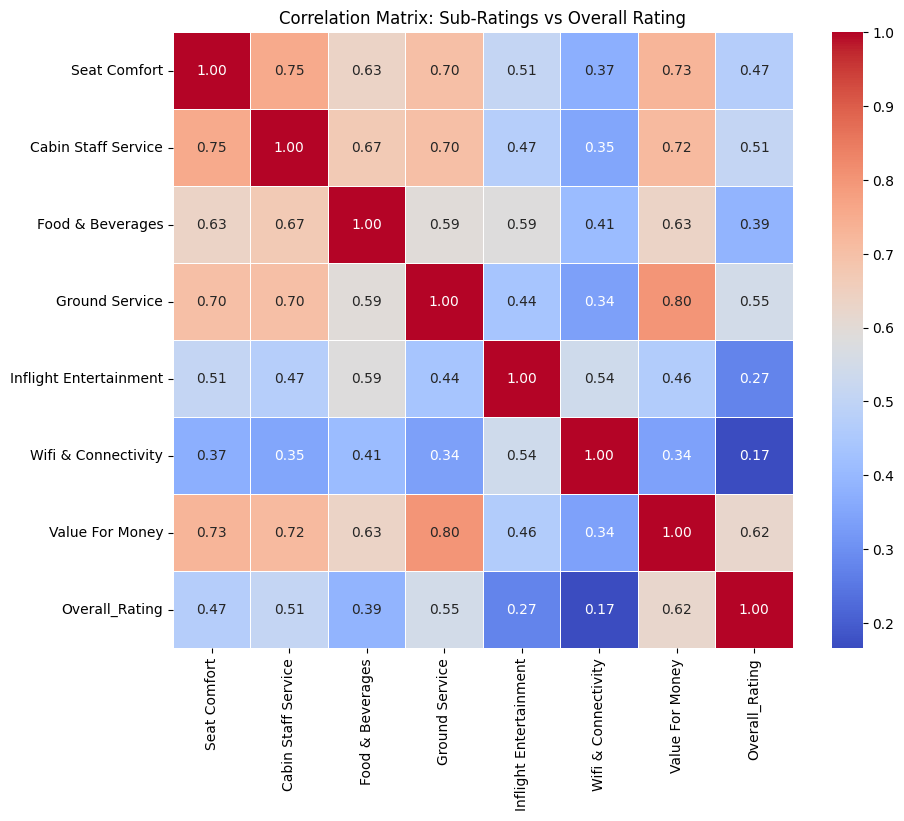

In [ ]:
sub_ratings = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
               'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']

correlation_matrix = df[sub_ratings + ['Overall_Rating']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Sub-Ratings vs Overall Rating')
plt.show()

Use Random Forest Regressor to Identify Feature Importance

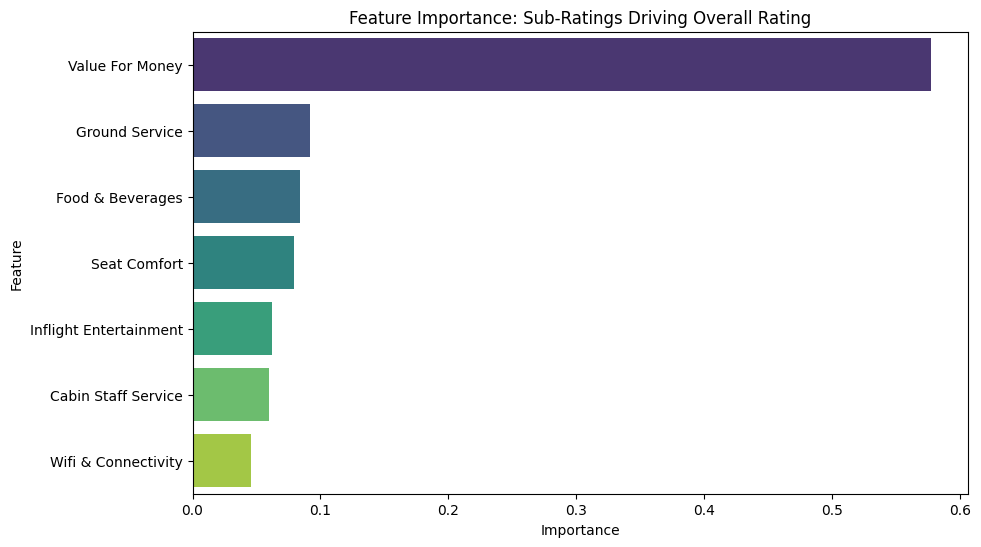

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df[sub_ratings].fillna(df[sub_ratings].mean())
y = df['Overall_Rating'].astype(float)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': sub_ratings,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance: Sub-Ratings Driving Overall Rating')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The most significant factors impacting the Overall Rating (passenger satisfaction) are:

**a. Value For Money (Top Priority)**

Importance: ~0.6 (highest)

Insight: Passengers’ perception of whether they got good value for their money is the single most important driver of satisfaction.

Implication: Ensuring that the pricing is competitive and aligned with the service offered is critical. Offering clear value propositions (e.g., extra perks, competitive pricing) will directly impact customer satisfaction.

b. **Ground Service & Cabin Staff Service (Highly Important)**

Importance: Significant but less than Value For Money.

Insight: The quality of service at the ground level (check-in, boarding, gate handling) and in-flight (cabin crew service) plays a major role in shaping passenger opinions.

Implication: Staff training and customer service improvements should be a priority. Exceptional customer service can boost customer loyalty and satisfaction.

c. **Seat Comfort (Critical Physical Aspect)**

Importance: Moderately high, after ground and cabin service.

Insight: Comfort is a tangible and physical part of the experience, and poor seat comfort can significantly detract from the overall satisfaction.

Implication: Investments in ergonomic seating and enhancing comfort features (e.g., legroom, seat recline, padding) are essential to maintaining satisfaction, especially for long flights.

d. **Food & Beverages & Inflight Entertainment (Lower Priority)**

Importance: Moderate, but less impactful than the core service and comfort aspects.

Insight: These are amenities that enhance the experience but do not carry as much weight in satisfaction ratings compared to service and comfort.

Implication: Improvements to food quality and variety could elevate the overall experience, but inflight entertainment (while important) may not provide a significant return on investment in terms of satisfaction.

e. **Wifi & Connectivity (Least Important)**

Importance: The least impactful in the dataset.

Insight: Despite being a popular service feature, Wi-Fi and connectivity do not significantly affect overall ratings for this particular airline. This suggests that passengers prioritize other aspects more strongly.

Implication: Investments in Wi-Fi may not yield as high a return in terms of improving customer satisfaction compared to improving value, service, and comfort. However, it may still serve as a useful differentiator for some passengers.

# Step 3: Text Insights (Reviews Content)

- Preprocess reviews (clean text, lowercase, remove stopwords).

- Convert text into numerical features (TF-IDF).

- Apply algorithm (e.g., KMeans clustering or LDA topic modeling) to group themes.

- Count top words per cluster/topic and label them as positive/negative themes.

- Visualize theme frequencies with bar charts.

 Split Reviews by Sentiment

In [ ]:
positive_reviews = df[df['Sentiment_Label'] == 'Positive']['Review']
negative_reviews = df[df['Sentiment_Label'] == 'Negative']['Review']

Define Function for Clustering

In [ ]:
def cluster_themes(reviews, n_clusters=5):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(reviews)

    km = KMeans(n_clusters=n_clusters, random_state=42)
    km.fit(X)


    terms = vectorizer.get_feature_names_out()
    cluster_keywords = {}
    for i in range(n_clusters):
        top_indices = km.cluster_centers_[i].argsort()[-5:][::-1]
        cluster_keywords[f"Cluster {i+1}"] = [terms[j] for j in top_indices]


    cluster_counts = pd.Series(km.labels_).value_counts().sort_index()

    return cluster_counts, cluster_keywords

Apply to Positive & Negative

In [ ]:
pos_counts, pos_keywords = cluster_themes(positive_reviews, n_clusters=5)
neg_counts, neg_keywords = cluster_themes(negative_reviews, n_clusters=5)

Plotting and Show Cluster Keywords

Positive Themes (keywords per cluster):
Cluster 1 → flight, good, crew, service, cabin
Cluster 2 → refund, flight, cancelled, customer, ticket
Cluster 3 → class, business, economy, flight, good
Cluster 4 → luggage, bag, pay, check, bags
Cluster 5 → flight, hours, delayed, airport, time

Negative Themes (keywords per cluster):
Cluster 1 → seats, seat, flight, food, crew
Cluster 2 → flight, delayed, hours, time, delay
Cluster 3 → flight, cancelled, day, flights, airport
Cluster 4 → luggage, bag, baggage, check, pay
Cluster 5 → refund, customer, service, airline, flight


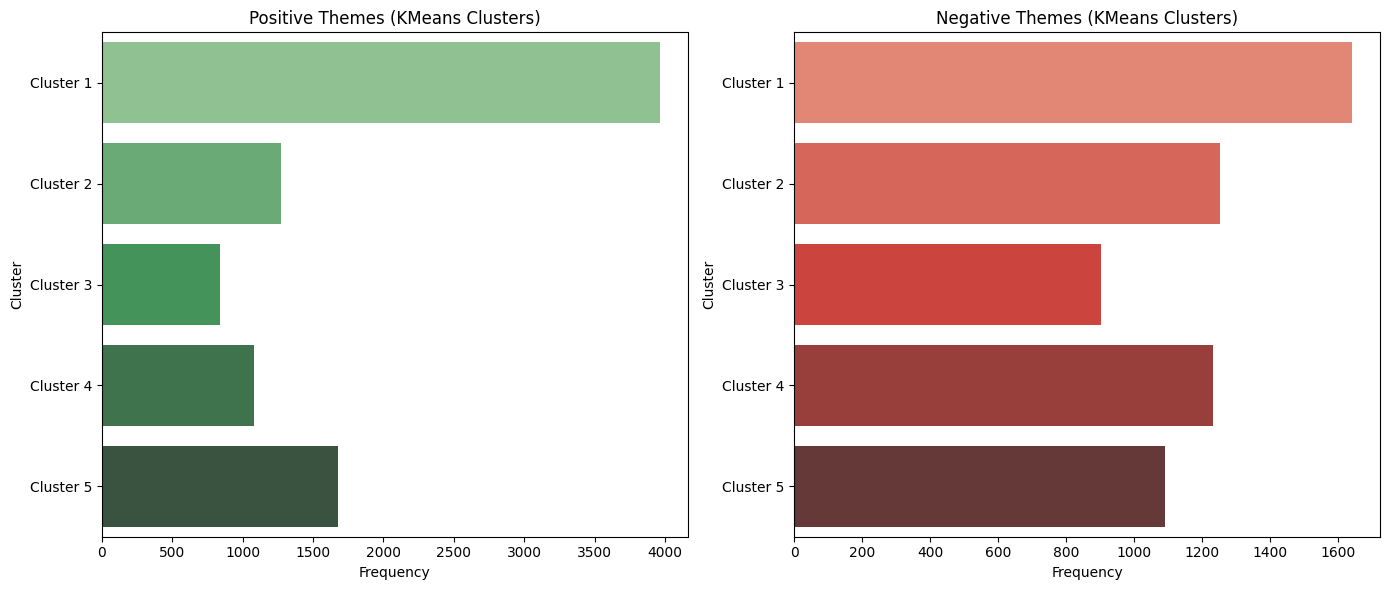

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positive Themes
sns.barplot(x=pos_counts.values, y=[f"Cluster {i+1}" for i in pos_counts.index],
            ax=axes[0], palette="Greens_d")
axes[0].set_title("Positive Themes (KMeans Clusters)", fontsize=12)
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Cluster")

# Negative Themes
sns.barplot(x=neg_counts.values, y=[f"Cluster {i+1}" for i in neg_counts.index],
            ax=axes[1], palette="Reds_d")
axes[1].set_title("Negative Themes (KMeans Clusters)", fontsize=12)
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Cluster")

plt.tight_layout()

print("Positive Themes (keywords per cluster):")
for cluster, words in pos_keywords.items():
    print(cluster, "→", ", ".join(words))

print("\nNegative Themes (keywords per cluster):")
for cluster, words in neg_keywords.items():
    print(cluster, "→", ", ".join(words))

plt.show()

# Step 4: Benchmarking & Segmentation

- Compare airlines: e.g., Airline A vs Airline B on average ratings.

- Compare routes or regions: e.g., Asia vs Europe flights.

- Compare travel classes: economy vs business vs first class.



Compare Airlines: Average Ratings by Airline

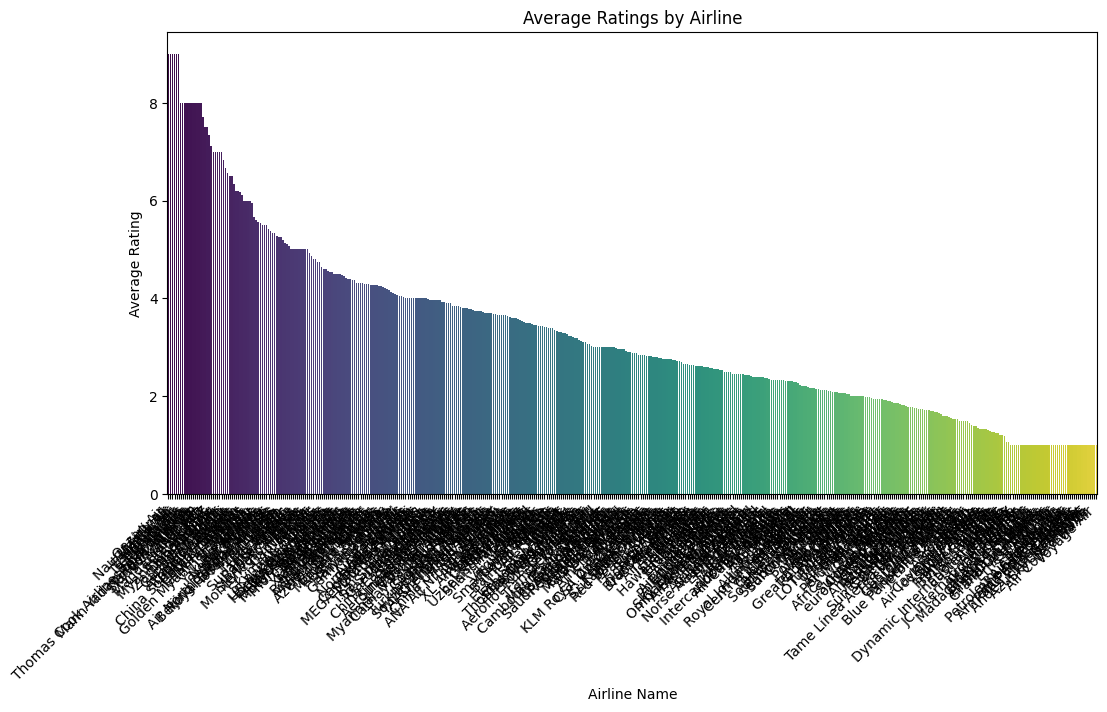

In [ ]:
airline_ratings = df.groupby('Airline Name')['Overall_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=airline_ratings.index, y=airline_ratings.values, palette='viridis')
plt.title('Average Ratings by Airline')
plt.xlabel('Airline Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

Compare Routes/Regions: Average Ratings by Route or Region

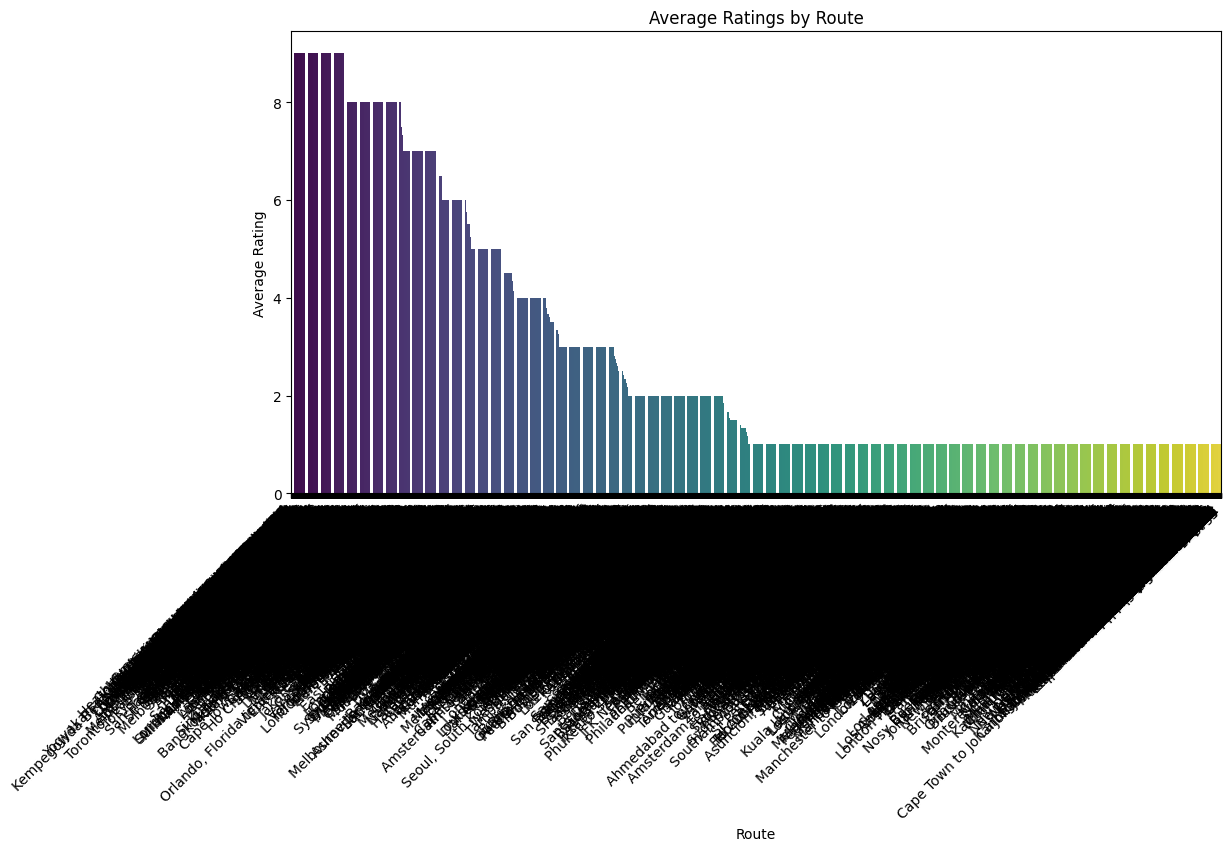

In [ ]:
route_ratings = df.groupby('Route')['Overall_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=route_ratings.index, y=route_ratings.values, palette='viridis')
plt.title('Average Ratings by Route')
plt.xlabel('Route')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

Compare Travel Classes: Average Ratings by Seat Type

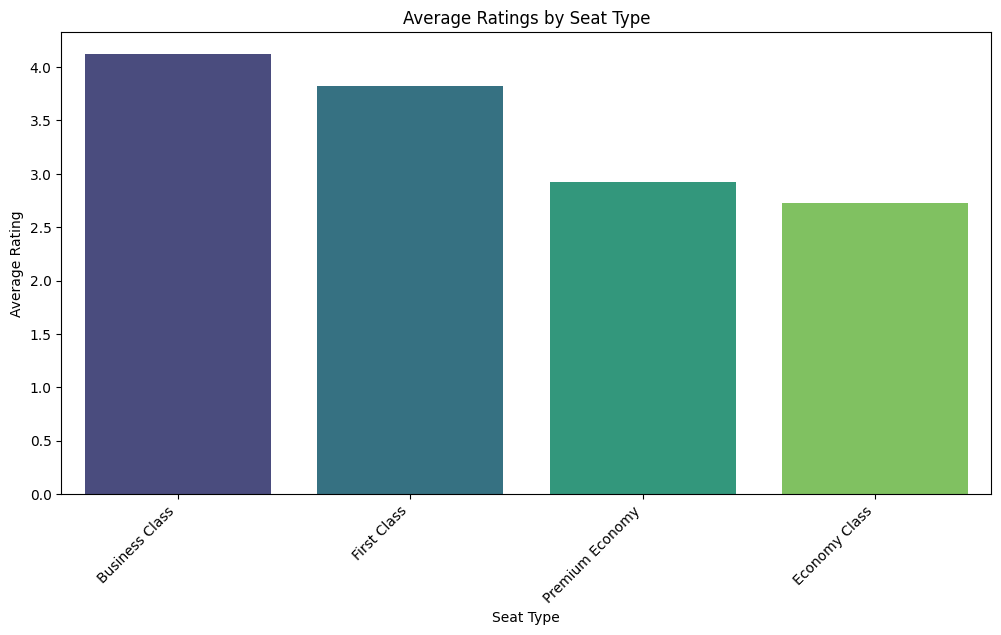

In [ ]:
seat_type_ratings = df.groupby('Seat Type')['Overall_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=seat_type_ratings.index, y=seat_type_ratings.values, palette='viridis')
plt.title('Average Ratings by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Step 5: Actionable Recommendations
**Strategic Recommendations for the Airline**

Based on the above insights, here are the strategic actions the airline should consider:



a. **Optimize Pricing and Value Perception**

Priority: High

*Action: Ensure the pricing is competitive for the level of service provided. Introduce value-driven packages, transparent pricing, and perks that enhance perceived value (e.g., meal deals, free baggage, or better legroom).*

b. **Invest in Staff Training and Service Efficiency**

Priority: High

*Action: Invest in customer service training for both ground staff and cabin crew to ensure passengers receive exceptional service. Focus on improving staff responsiveness, friendliness, and problem resolution. Building a reputation for great service will be crucial to boosting satisfaction.*

c.** Focus on Improving Seat Comfort**

Priority: Medium-High

*Action: Evaluate and improve the seating arrangements, focusing on comfort. For long-haul flights, consider offering ergonomic seating options, better recline, and more legroom to ensure physical comfort is prioritized.*

d. **Enhance Food & Beverages and Inflight Entertainment**

Priority: Medium

*Action: While not the highest priority, the airline can refresh its food offerings to include more variety, healthier options, and regionally popular dishes. In-flight entertainment options can also be expanded but without significant investments—perhaps by focusing on improving the quality rather than the quantity of entertainment.*

e. **Reevaluate Wi-Fi Investments**

Priority: Low

*Action: Given that Wi-Fi does not significantly influence satisfaction, the airline should reconsider large-scale investments in improving Wi-Fi services. Instead, focus on enhancing other customer experience elements with a higher return on investment.*

# Conclusion

To boost overall satisfaction and customer loyalty, Value For Money, Cabin Staff Service, and Seat Comfort should be the top areas of focus. The airline should continue to invest in service quality and pricing strategies, while amenities like Wi-Fi and food can be improved selectively based on passenger feedback.